# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# READING DATASET

In [ ]:
data = pd.read_csv('survey.csv')
data.head(10).style.applymap(lambda x : "background-color: #eaedb4")

,Timestamp,Name,Which age group do you belong to?,Gender,Occupation,Do you find mental health important?,Do you or anyone you know face any mental health issues?,"If yes, then does it affect your/ their day to day activities?",Are they seeking any kind of treatment for it?,What causes mental health issues according to you?,How has the pandemic situation affected your mental health?,Do you think therapy helps during mental illness?,How much time does it take to recover from such a situation according to you?,How do you think one can improve their mental health?,"If you selected other, then enter how you think one can improve their mental health (try keeping it short)",How do families respond to a relative with mental health problems?,How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)
0,27/01/2022 11:30:46,Riya,20-35,Female,Student,Yes,Yes,Yes,No,Some sort of trauma or abuse,Significantly,Yes,Varies from person to person,"Exercise, Therapy, Talking to people, Developing hobbies, A healthy sleep routine",nan,"Discrimination, Stigmatization, Social exclusion",2.000000
1,27/01/2022 11:31:56,Saswata Ghosh,20-35,Male,College undergraduate,Yes,Yes,Yes,No,Breakups,Significantly,Yes,Varies from person to person,"Exercise, Talking to people, Developing hobbies, A healthy sleep routine",nan,"Discrimination, Social exclusion",2.000000
2,27/01/2022 11:32:09,Shivam Kumar,20-35,Male,Student,Yes,Yes,Yes,No,Social isolation or loneliness,Significantly,Yes,Varies from person to person,"Exercise, Therapy, Talking to people, Developing hobbies",nan,Helpful reaction,2.000000
3,27/01/2022 11:33:48,Vania,13-19,Female,Student,Yes,Yes,Yes,No,No clue,Moderately,Yes,Varies from person to person,Therapy,nan,Stigmatization,2.000000
4,27/01/2022 11:34:16,Varun,13-19,Male,student,Yes,Yes,No,Yes,Almost anything,Moderately,Yes,Varies from person to person,"Exercise, Therapy, Developing hobbies, A healthy sleep routine",nan,"Discrimination, Stigmatization, Helpful reaction",2.000000
5,27/01/2022 11:34:33,Sristi Banerjee,20-35,Female,Student,Yes,Yes,Yes,No,Some sort of trauma or abuse,Significantly,Yes,Can't say,"Exercise, Therapy, Talking to people",nan,"Stigmatization, Social exclusion",1.000000
6,27/01/2022 11:35:25,Amitabh Singh,20-35,Male,Entrepreneur,Yes,Yes,Yes,No,"Mental health can be triggered by anyone or anything, all the above things may be a issue.",Significantly,Yes,Varies from person to person,"Exercise, Therapy, Talking to people, Developing hobbies, A healthy sleep routine, Giving it time and let it be",nan,"Discrimination, Stigmatization, Social exclusion, Helpful reaction",2.000000
7,27/01/2022 11:36:26,Dip Chakraborty,35-50,Male,Service,Yes,Yes,Yes,Yes,Any other health condition,Moderately,Yes,Varies from person to person,"Therapy, Talking to people, Developing hobbies",nan,Helpful reaction,3.000000
8,27/01/2022 11:37:12,Ankit,13-19,Male,Student,Yes,Yes,Yes,No,Some sort of trauma or abuse,Significantly,Yes,Varies from person to person,"Exercise, Therapy, Talking to people, A healthy sleep routine, Journaling and accepting things for as they are",nan,"Stigmatization, Social exclusion, None of these",2.000000
9,27/01/2022 11:38:15,Bhavna Suresh Rao,13-19,Female,Student,Yes,Yes,Yes,No,All of the above,Significantly,Yes,Varies from person to person,"Therapy, Talking to people, Developing hobbies, A healthy sleep routine",nan,Social exclusion,3.000000


# EXPLORATORY ANALYSIS

In [ ]:
def EDA(df):

    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
    print(df.shape,
          '\n------------------------------------------------------------------------------------\n')

    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns,
          '\n------------------------------------------------------------------------------------\n')

    print('\033[1m' + 'Datatpes and Missing values:' + '\033[0m')
    print(df.info(),
          '\n------------------------------------------------------------------------------------\n')

    for col in df.columns:
        print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(data[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')

    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    print(df.describe(include='all'),
          '\n------------------------------------------------------------------------------------\n')



    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())

EDA(data)

EXPLORATORY DATA ANALYSIS :

Shape of the data (rows, columns):
(342, 17) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['Timestamp', 'Name', 'Which age group do you belong to?', 'Gender',
       'Occupation', 'Do you find mental health important? ',
       'Do you or anyone you  know face any mental health issues? ',
       'If yes, then does it affect your/ their day to day activities? ',
       'Are they seeking any kind of treatment for it?',
       'What causes mental health issues according to you?',
       'How has the pandemic situation affected your mental health?',
       'Do you think therapy helps during mental illness?',
       'How much time does it take to recover from such a situation according to you?',
       'How do you think one can improve their mental health?',
       'If you selected other, then enter how you think one can improve their mental health (try keeping it short)',
       'H

# DATA PREPROCESSING

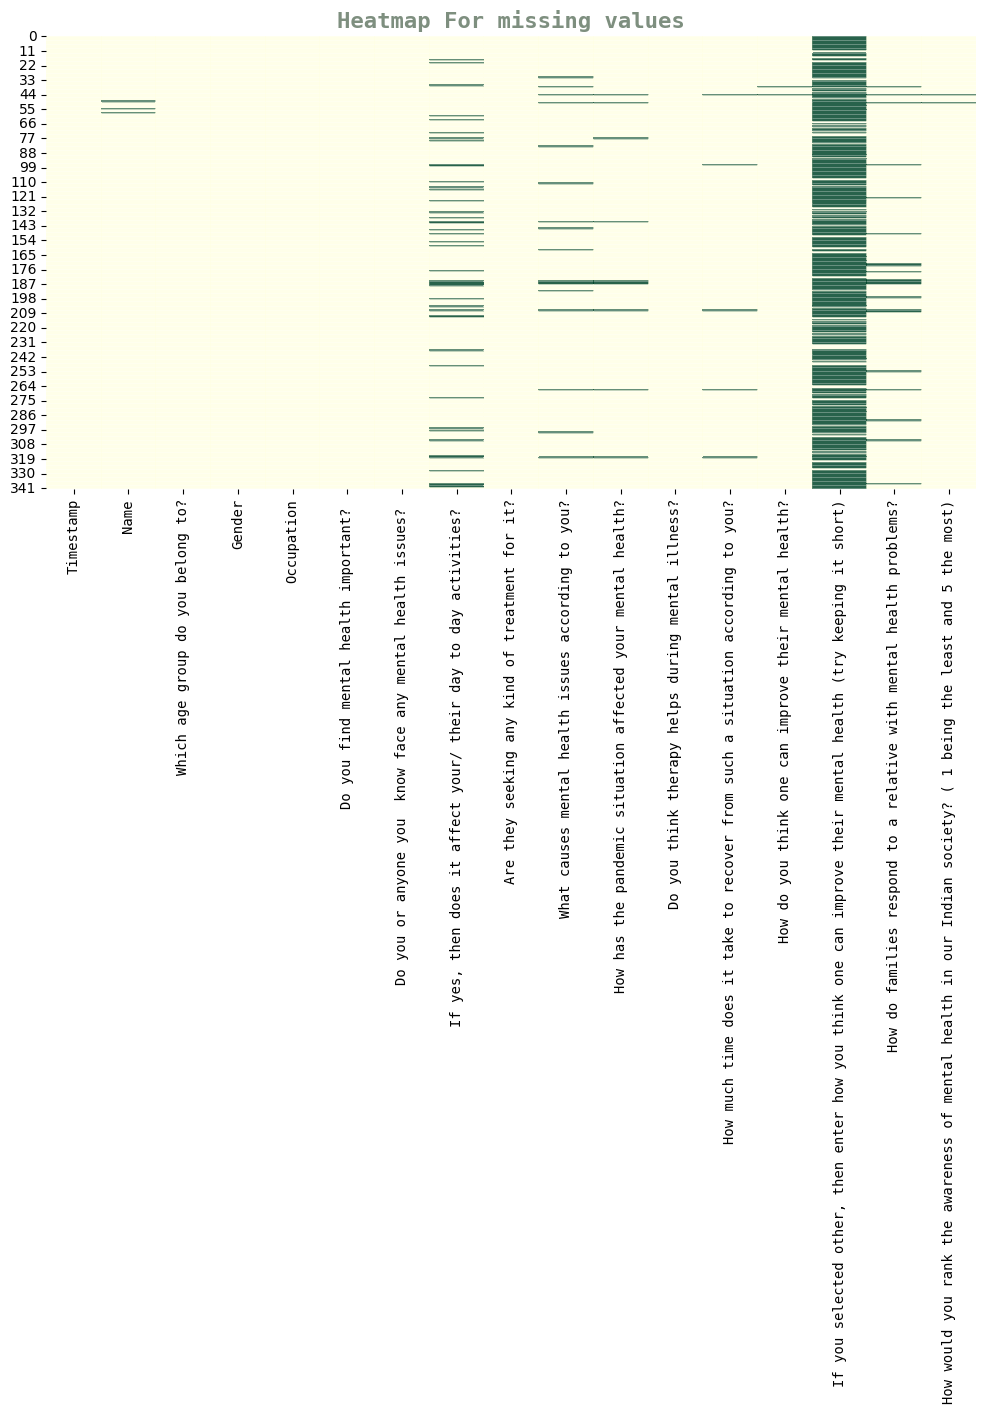

In [ ]:
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(data.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)
plt.show()

In [ ]:
cols = []
props = []
prop = {'Column' : cols, 'Missing_Proportion': props}
for col in data.columns:
    missing_prop = data[col].isna().sum() / data.shape[0] * 100
    if missing_prop > 0:
        cols.append(col)
        props.append(missing_prop)

prop = pd.DataFrame(prop).sort_values('Missing_Proportion', ignore_index=True)
prop.style.applymap(lambda x : "background-color: #eaedb4")

,Column,Missing_Proportion
0,How do you think one can improve their mental health?,0.584795
1,How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most),0.584795
2,Name,0.877193
3,How much time does it take to recover from such a situation according to you?,1.461988
4,How has the pandemic situation affected your mental health?,2.923977
5,What causes mental health issues according to you?,4.970760
6,How do families respond to a relative with mental health problems?,6.140351
7,"If yes, then does it affect your/ their day to day activities?",12.865497
8,"If you selected other, then enter how you think one can improve their mental health (try keeping it short)",84.210526


In [ ]:
#DROPPING "IF YOU SELECTED OTHER..."COLUMN BECAUSE TOO MUCH NA VALUE PERCENTAGE
df = data.drop(columns=['If you selected other, then enter how you think one can improve their mental health (try keeping it short)', 'Timestamp','Name'])
print('\033[1m' + 'Columns in updated Dataframe :' + '\033[0m', len(df.columns))

Columns in updated Dataframe : 14


# HANDLING MISSING VALUES

In [ ]:
#IMPUTING VALUES

df['If yes, then does it affect your/ their day to day activities? ']=df['If yes, then does it affect your/ their day to day activities? '].fillna('No')
df['How do families respond to a relative with mental health problems?']=df['How do families respond to a relative with mental health problems?'].fillna('None of these')
df['What causes mental health issues according to you?']=df['What causes mental health issues according to you?'].fillna(df['What causes mental health issues according to you?'].mode().iloc[0])
df['How much time does it take to recover from such a situation according to you?']=df['How much time does it take to recover from such a situation according to you?'].fillna(df['How much time does it take to recover from such a situation according to you?'].mode().iloc[0])
df['How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)']=df['How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)'].fillna(df['How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)'].mode().iloc[0])

In [ ]:
df['How has the pandemic situation affected your mental health?']=df['How has the pandemic situation affected your mental health?'].map({'Significantly':1,'Moderately':2,'Not Significantly':3})
df['How has the pandemic situation affected your mental health?'].unique()


array([ 1.,  2.,  3., nan])

In [ ]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=2)
df_filled=imputer.fit_transform(df[['How has the pandemic situation affected your mental health?','How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)']])
df_filled


array([[1. , 2. ],
       [1. , 2. ],
       [1. , 2. ],
       [2. , 2. ],
       [2. , 2. ],
       [1. , 1. ],
       [1. , 2. ],
       [2. , 3. ],
       [1. , 2. ],
       [1. , 3. ],
       [1. , 2. ],
       [1. , 1. ],
       [1. , 3. ],
       [3. , 2. ],
       [2. , 1. ],
       [2. , 3. ],
       [2. , 3. ],
       [1. , 2. ],
       [3. , 3. ],
       [2. , 5. ],
       [2. , 1. ],
       [1. , 2. ],
       [2. , 2. ],
       [1. , 3. ],
       [2. , 2. ],
       [2. , 3. ],
       [2. , 3. ],
       [1. , 4. ],
       [2. , 2. ],
       [2. , 3. ],
       [2. , 2. ],
       [3. , 5. ],
       [2. , 2. ],
       [3. , 1. ],
       [2. , 2. ],
       [2. , 4. ],
       [1. , 3. ],
       [2. , 3. ],
       [3. , 5. ],
       [3. , 2. ],
       [2. , 1. ],
       [2. , 2. ],
       [3. , 2. ],
       [2. , 2. ],
       [1. , 2. ],
       [2. , 2. ],
       [2. , 5. ],
       [2. , 2. ],
       [1. , 2. ],
       [2. , 2. ],
       [1. , 2. ],
       [2. , 2. ],
       [3. ,

In [ ]:
df.isnull().sum()

Which age group do you belong to?                                                                                0
Gender                                                                                                           0
Occupation                                                                                                       0
Do you find mental health important?                                                                             0
Do you or anyone you  know face any mental health issues?                                                        0
If yes, then does it affect your/ their day to day activities?                                                   0
Are they seeking any kind of treatment for it?                                                                   0
What causes mental health issues according to you?                                                               0
How has the pandemic situation affected your mental health?                     

In [ ]:
labelDict = {}
for feature in df:
    if feature=='How has the pandemic situation affected your mental health?' or feature=='How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)':

      continue

    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Which age group do you belong to? ['1-12', '13-19', '19-30', '20-35', '35-50', '50 and above']
label_Gender ['.', 'Female', 'Male', 'Prefer not to say', 'Them']
label_Occupation ['.', '2nd year graduate student ', 'Actor', 'Army', 'Assistant professor', 'BKCPA', 'Banker', 'Bartender', 'Business', 'Businessman ', 'College Student', 'College student', 'College undergraduate', 'Consultant', 'Consultant ', 'Content creator', 'Data Consultant', 'Drawing', 'Employee', 'Engineer', 'Engineering Student', 'Entrepreneur', 'Ex-military', 'Faculty', 'Gamer', 'Govt executive ', 'Graphics Designer HK India', 'Hairstylist ', 'Home maker', 'Home stay', 'Homemaker', 'Homemaker ', 'Homemaler', 'House Wife', 'Housewife', 'Housewife ', 'IT Professional', 'Intern', 'Investment Banker', 'Investor', 'Janitor', 'Job', 'Lawyer', 'Make-up artist', 'Medical Student ', 'Musician', 'None', 'Pilot', 'Preschool Teacher ', 'Professional ', 'Professional student', 'Professor', 'Property Manager', 'Real Estate De

In [ ]:
df

,Which age group do you belong to?,Gender,Occupation,Do you find mental health important?,Do you or anyone you know face any mental health issues?,"If yes, then does it affect your/ their day to day activities?",Are they seeking any kind of treatment for it?,What causes mental health issues according to you?,How has the pandemic situation affected your mental health?,Do you think therapy helps during mental illness?,How much time does it take to recover from such a situation according to you?,How do you think one can improve their mental health?,How do families respond to a relative with mental health problems?,How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)
0,3,1,67,1,1,1,0,38,1.0,1,4,41,6,2.0
1,3,2,12,1,1,1,0,12,1.0,1,4,22,2,2.0
2,3,2,67,1,1,1,0,31,1.0,1,4,40,9,2.0
3,1,1,67,1,1,1,0,27,2.0,1,4,67,14,2.0
4,1,2,80,1,1,0,1,4,2.0,1,4,33,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,3,2,67,1,1,1,0,17,2.0,1,3,73,9,3.0
338,1,2,67,1,0,0,0,67,3.0,0,4,64,10,1.0
339,3,2,67,1,0,0,0,51,3.0,1,4,33,4,2.0
340,1,2,67,1,0,0,0,38,2.0,1,4,44,10,1.0


In [ ]:
df.isnull().sum()

Which age group do you belong to?                                                                                0
Gender                                                                                                           0
Occupation                                                                                                       0
Do you find mental health important?                                                                             0
Do you or anyone you  know face any mental health issues?                                                        0
If yes, then does it affect your/ their day to day activities?                                                   0
Are they seeking any kind of treatment for it?                                                                   0
What causes mental health issues according to you?                                                               0
How has the pandemic situation affected your mental health?                     

In [ ]:
df.columns

Index(['Which age group do you belong to?', 'Gender', 'Occupation',
       'Do you find mental health important? ',
       'Do you or anyone you  know face any mental health issues? ',
       'If yes, then does it affect your/ their day to day activities? ',
       'Are they seeking any kind of treatment for it?',
       'What causes mental health issues according to you?',
       'How has the pandemic situation affected your mental health?',
       'Do you think therapy helps during mental illness?',
       'How much time does it take to recover from such a situation according to you?',
       'How do you think one can improve their mental health?',
       'How do families respond to a relative with mental health problems?',
       'How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)'],
      dtype='object')

# MODEL PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
X=df[['Which age group do you belong to?','Gender','Occupation','Do you find mental health important? ','Do you or anyone you  know face any mental health issues? ','Do you think therapy helps during mental illness?','How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)']]
y=df['Are they seeking any kind of treatment for it?']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
print(y_test)

92     0
280    1
132    0
279    0
6      0
      ..
307    0
176    0
248    1
221    0
5      0
Name: Are they seeking any kind of treatment for it?, Length: 103, dtype: int64


# RESULT


In [ ]:
k=0
for i in y_test:
  if i==0:
    k=k+1
print((k/103)*100)
if k>0.5:
  print('Most people are not taking any treatment for their affected mental health. If you are suffering from mental illnesses, please consult a doctor or talked to near one about it.')


70.87378640776699
Most people are not taking any treatment for their affected mental health. If you are suffering from mental illnesses, please consult a doctor or talked to near one about it.


In [ ]:
from sklearn import metrics

In [ ]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)



    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)

    print('########### Random Forests ###############')

    print(confusion_matrix(y_pred_class,y_test))

    accuracy = (69+1)/(69+1+4+26)
    print(accuracy*100)




In [ ]:
randomForest()

########### Random Forests ###############
[[69 29]
 [ 4  1]]
70.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rforest_clf=RandomForestClassifier()
cross_val_scores = cross_val_score(rforest_clf, X, y, cv=5)


In [ ]:
rforest_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred=rforest_clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


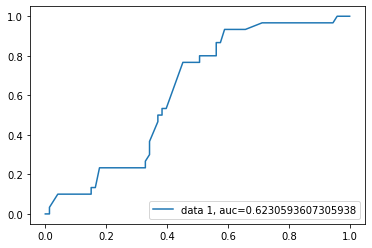

In [ ]:
y_pred_proba = rforest_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# VISUALIZATION

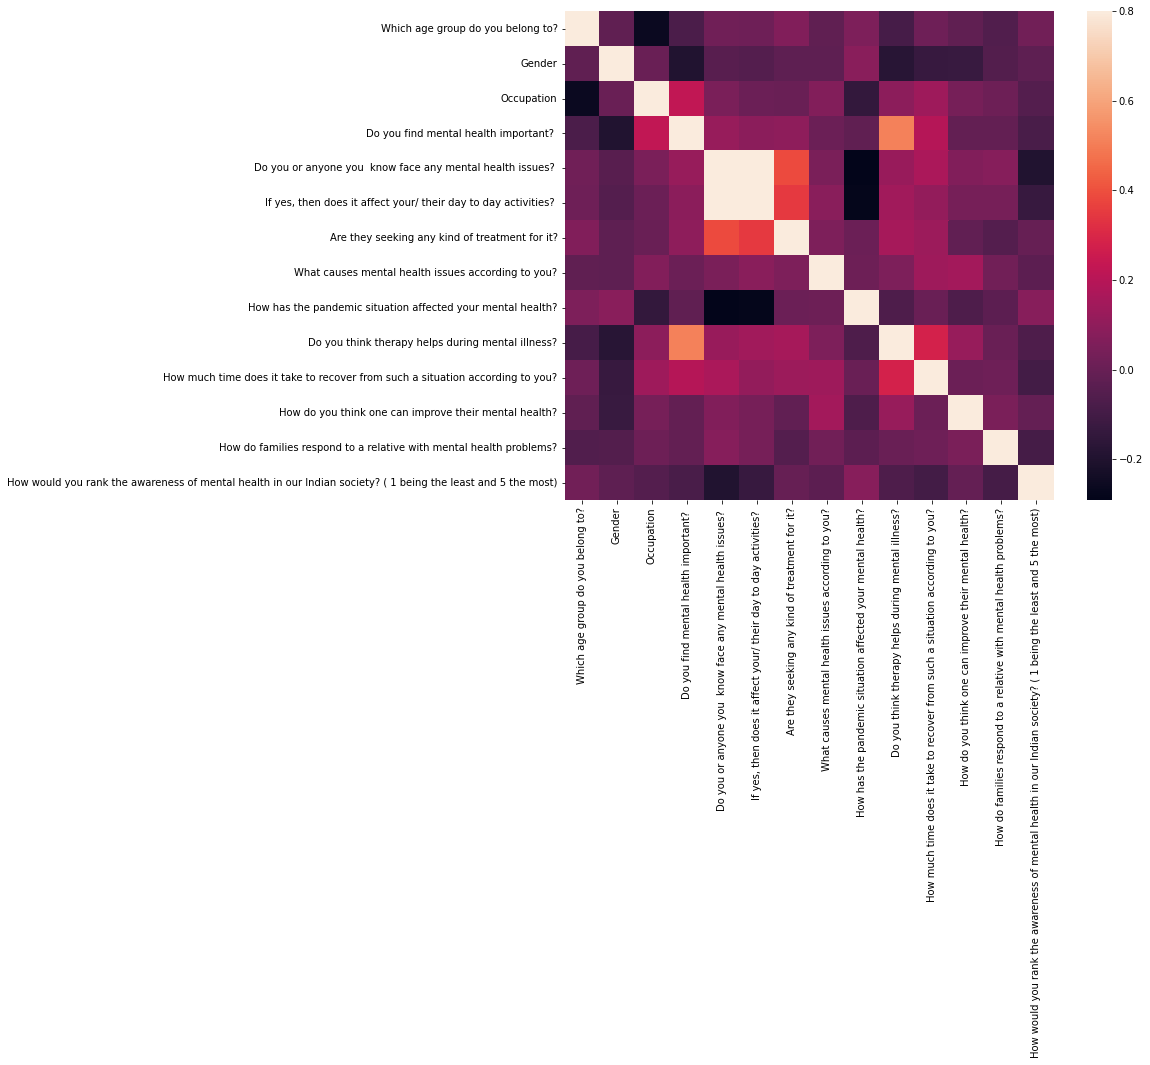

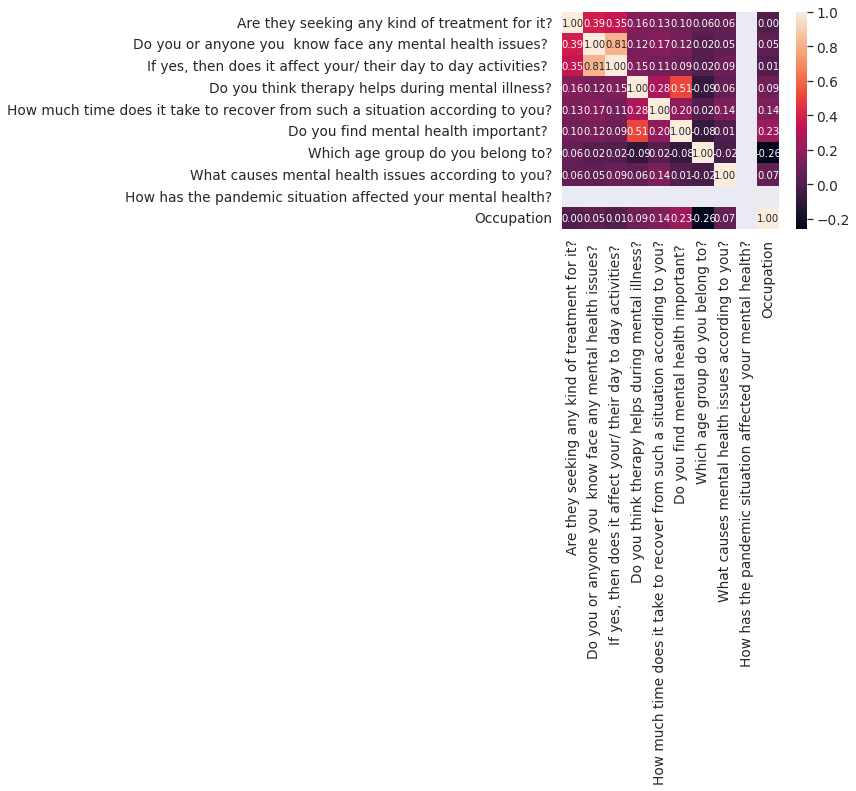

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Are they seeking any kind of treatment for it?')['Are they seeking any kind of treatment for it?'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df

,Which age group do you belong to?,Gender,Occupation,Do you find mental health important?,Do you or anyone you know face any mental health issues?,"If yes, then does it affect your/ their day to day activities?",Are they seeking any kind of treatment for it?,What causes mental health issues according to you?,How has the pandemic situation affected your mental health?,Do you think therapy helps during mental illness?,How much time does it take to recover from such a situation according to you?,How do you think one can improve their mental health?,How do families respond to a relative with mental health problems?,How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)
0,3,1,67,1,1,1,0,38,1.0,1,4,41,6,2.0
1,3,2,12,1,1,1,0,12,1.0,1,4,22,2,2.0
2,3,2,67,1,1,1,0,31,1.0,1,4,40,9,2.0
3,1,1,67,1,1,1,0,27,2.0,1,4,67,14,2.0
4,1,2,80,1,1,0,1,4,2.0,1,4,33,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,3,2,67,1,1,1,0,17,2.0,1,3,73,9,3.0
338,1,2,67,1,0,0,0,67,3.0,0,4,64,10,1.0
339,3,2,67,1,0,0,0,51,3.0,1,4,33,4,2.0
340,1,2,67,1,0,0,0,38,2.0,1,4,44,10,1.0


In [ ]:
df.columns

Index(['Which age group do you belong to?', 'Gender', 'Occupation',
       'Do you find mental health important? ',
       'Do you or anyone you  know face any mental health issues? ',
       'If yes, then does it affect your/ their day to day activities? ',
       'Are they seeking any kind of treatment for it?',
       'What causes mental health issues according to you?',
       'How has the pandemic situation affected your mental health?',
       'Do you think therapy helps during mental illness?',
       'How much time does it take to recover from such a situation according to you?',
       'How do you think one can improve their mental health?',
       'How do families respond to a relative with mental health problems?',
       'How would you rank the awareness of mental health in our Indian society? ( 1 being the least and 5 the most)'],
      dtype='object')

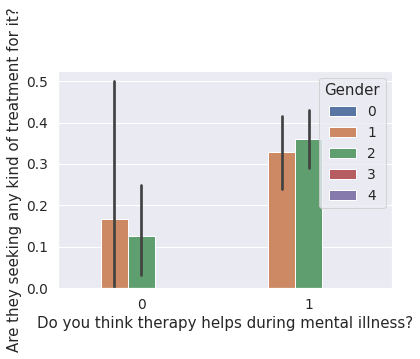

In [ ]:
sns.barplot(x=df['Do you think therapy helps during mental illness?'],y=df['Are they seeking any kind of treatment for it?'],hue=df['Gender'])

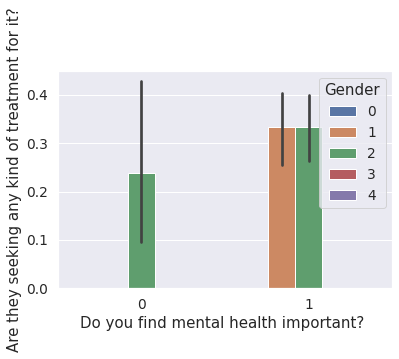

In [ ]:
sns.barplot(x=df['Do you find mental health important? '],y=df['Are they seeking any kind of treatment for it?'],hue=df['Gender'])

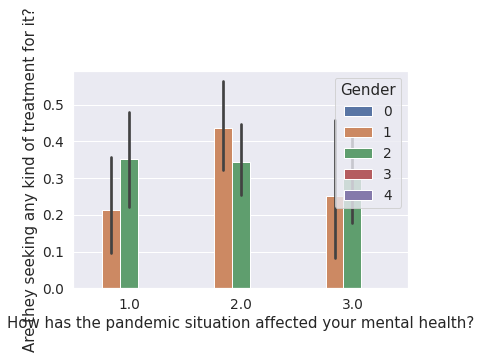

In [ ]:
sns.barplot(x=df['How has the pandemic situation affected your mental health?'],y=df['Are they seeking any kind of treatment for it?'],hue=df['Gender'])

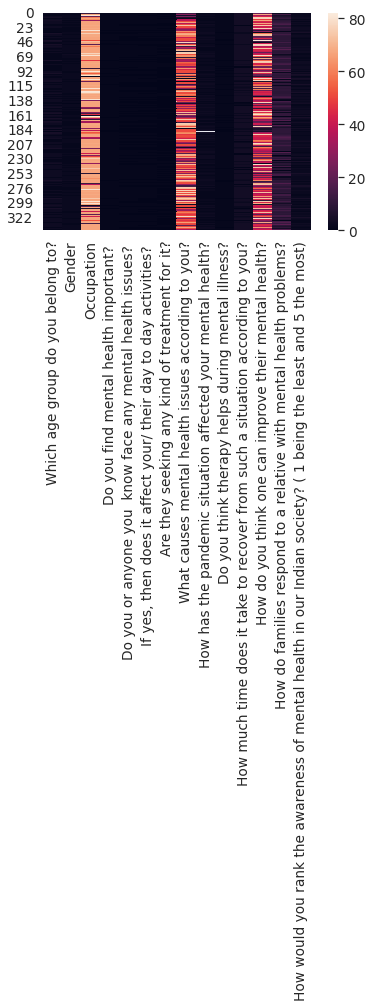

In [ ]:
sns.heatmap(df)

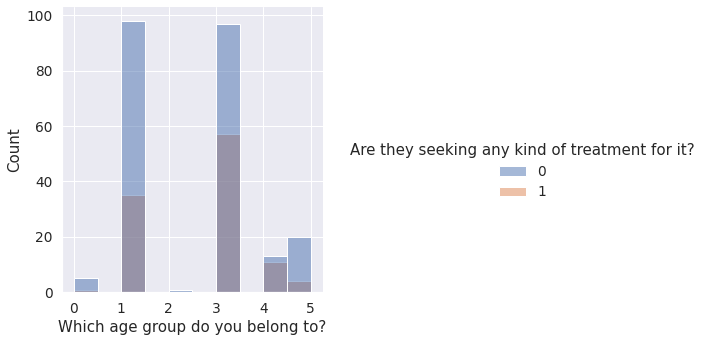

In [ ]:
sns.displot(x='Which age group do you belong to?',hue='Are they seeking any kind of treatment for it?',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



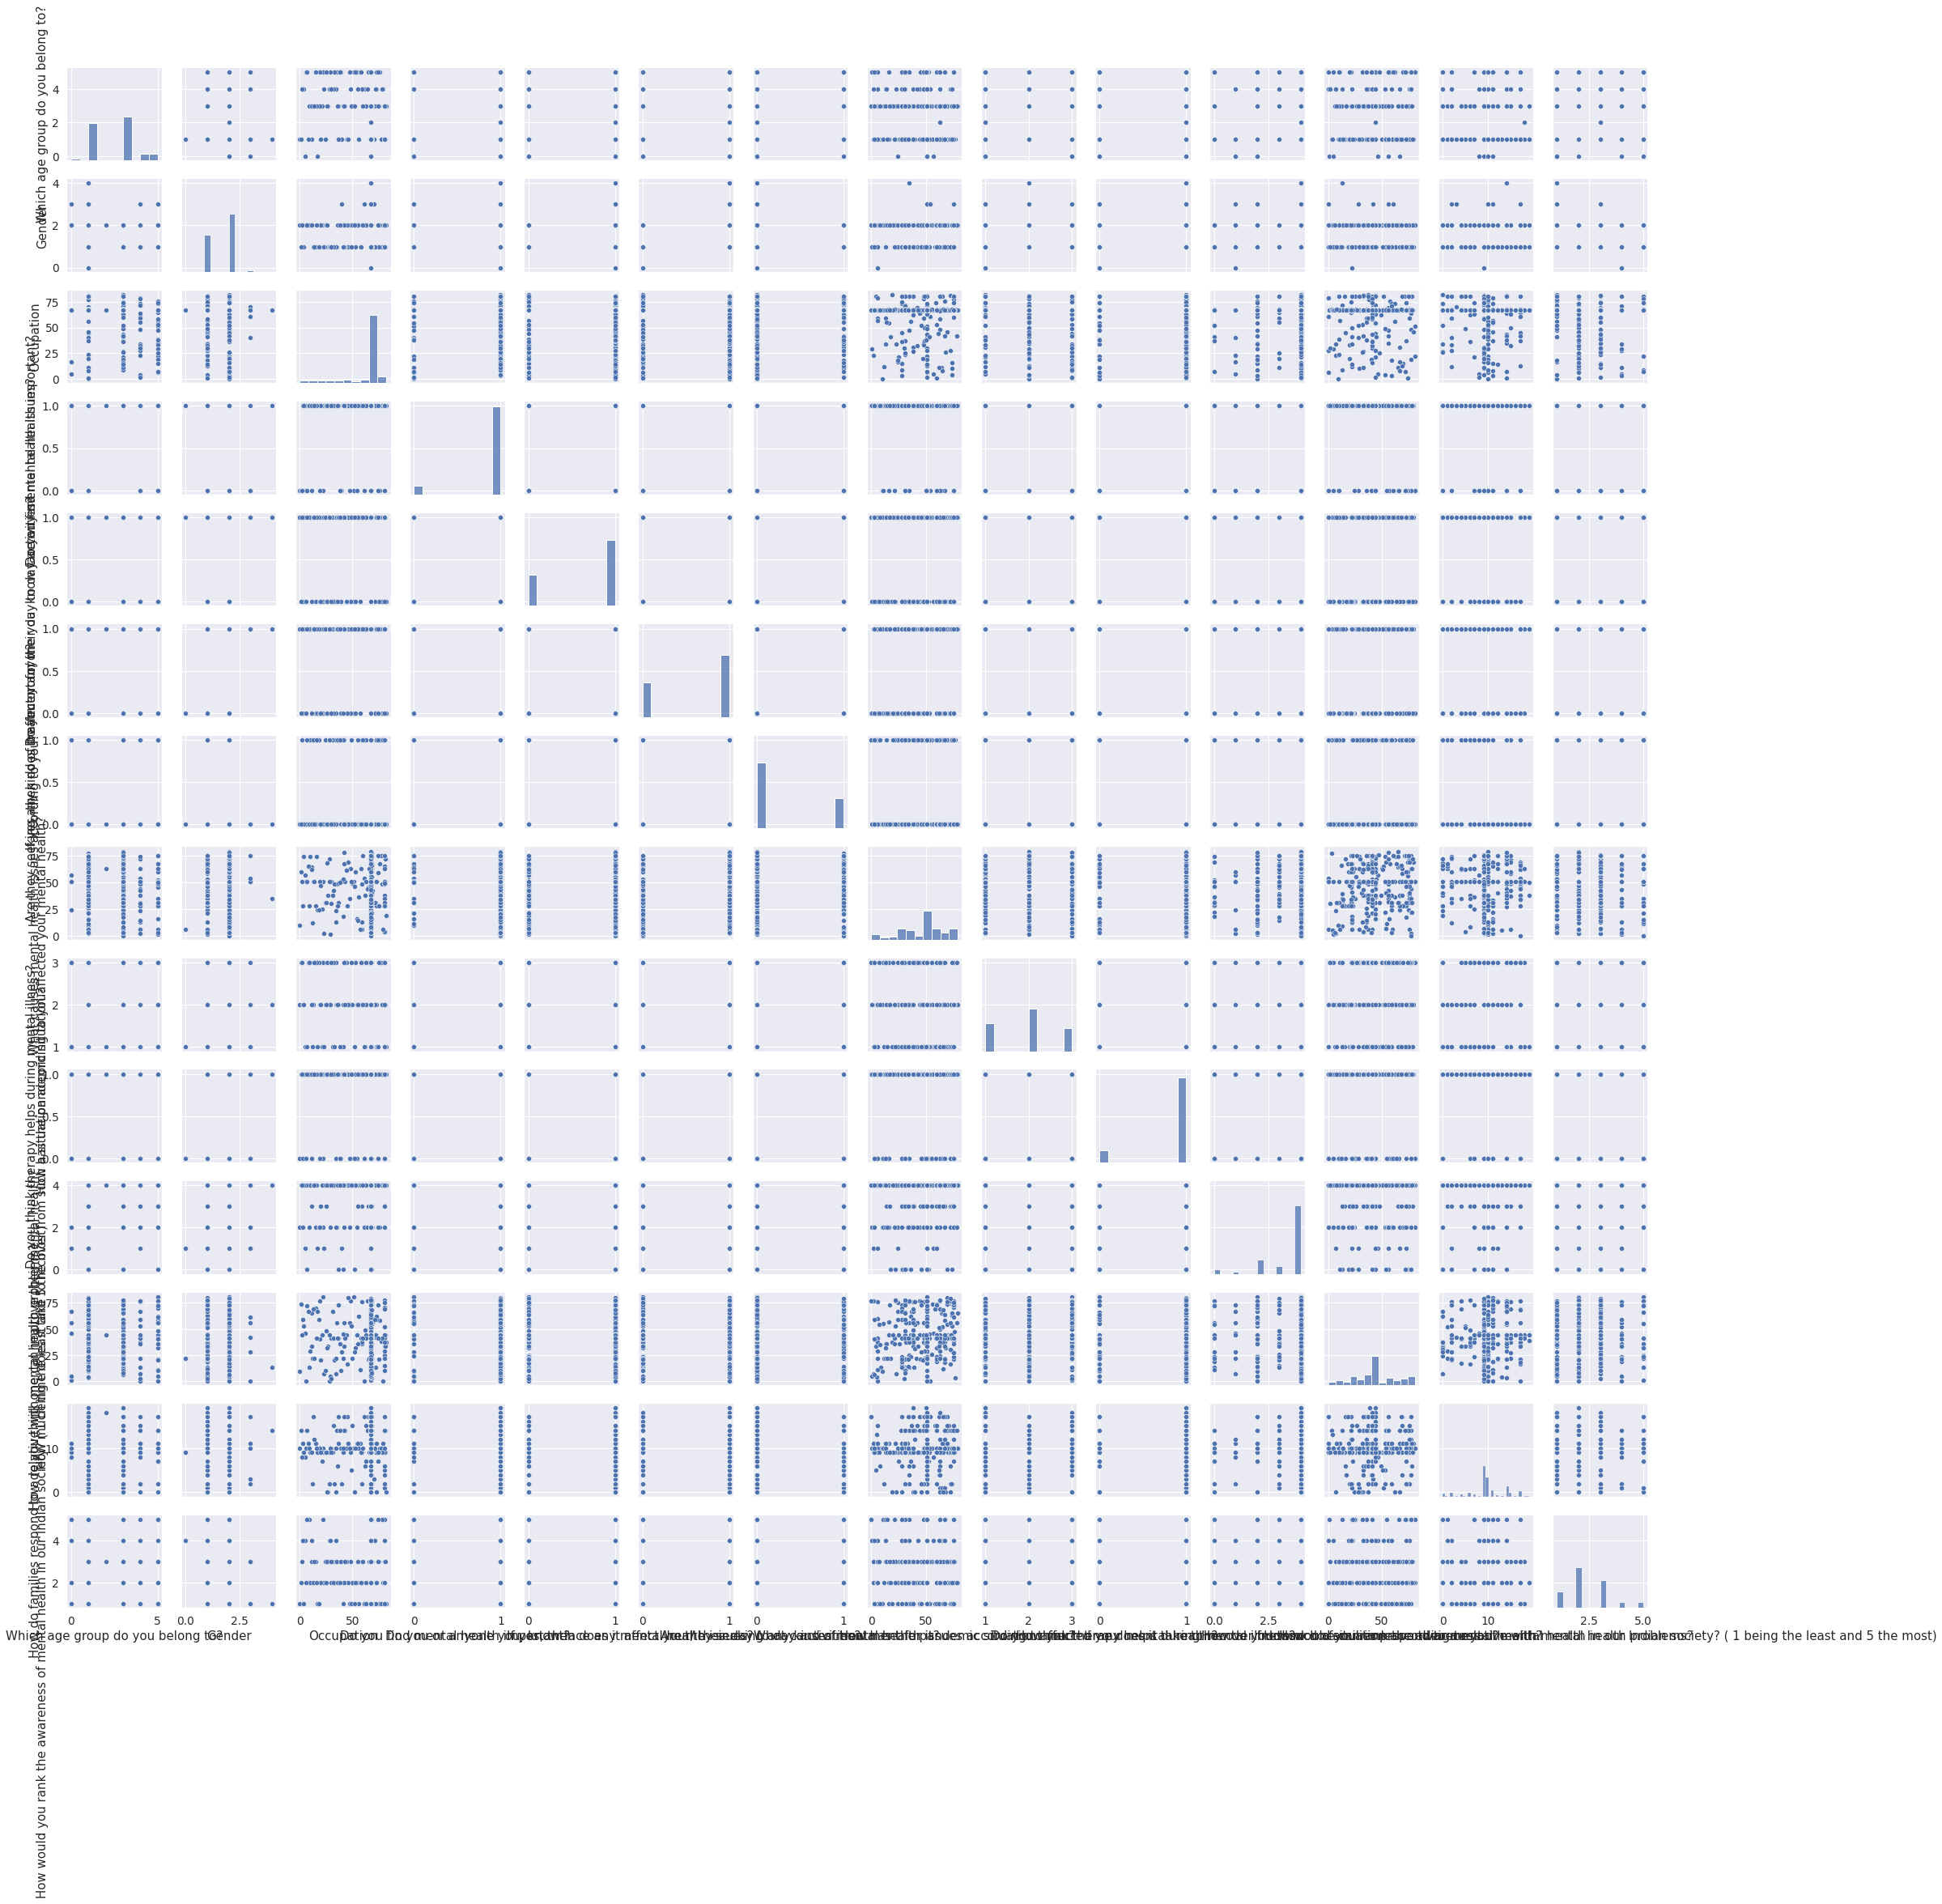

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
Lasso(alpha = 0.0001).fit
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))


Best alpha using built-in LassoCV: 0.006816
Best score using built-in LassoCV: 0.168962


In [ ]:
df.shape


(342, 14)

Lasso picked 5 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Mod')

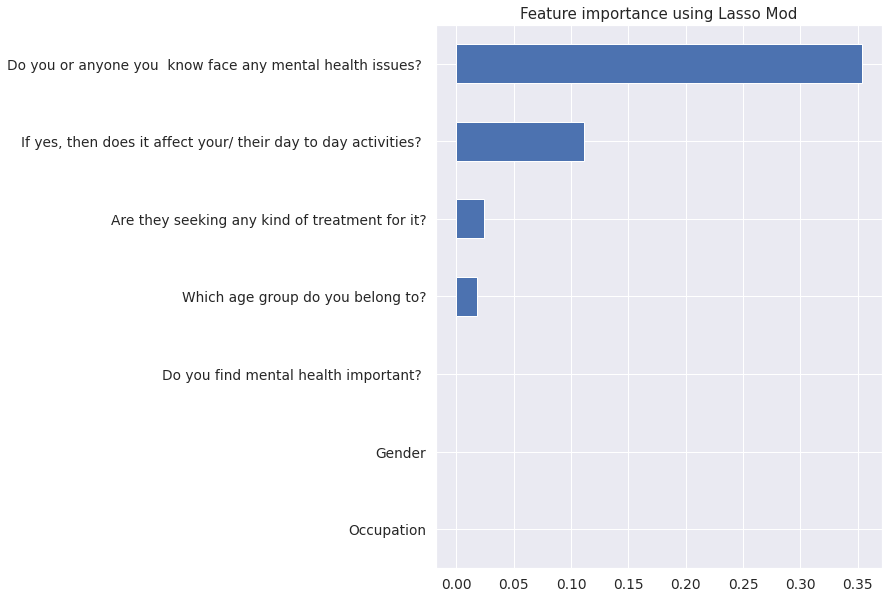

In [ ]:
coef = pd.Series(reg.coef_, index = df.columns[:7])

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Mod")